In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf
from tensorflow import keras


In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
from sklearn.model_selection import train_test_split
X_train_full , X_test , y_train_full , y_test = train_test_split(housing.data , housing.target , random_state=42)
X_train , X_valid , y_train , y_valid = train_test_split(X_train_full , y_train_full , random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape


(11610, 8)

In [10]:
model = keras.models.Sequential([
    keras.layers.Dense(30 , activation="relu" , input_shape=[8]),
    keras.layers.Dense(30 , activation="relu"),
    keras.layers.Dense(1)
])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["mae"])

In [18]:
model_history = model.fit(X_train , y_train , epochs=20 , validation_data=(X_valid , y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3949 - mae: 0.4489 - val_loss: 0.3695 - val_mae: 0.4322
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3922 - mae: 0.4469 - val_loss: 0.3698 - val_mae: 0.4350
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3898 - mae: 0.4461 - val_loss: 0.3647 - val_mae: 0.4285
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3873 - mae: 0.4439 - val_loss: 0.3632 - val_mae: 0.4309
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3851 - mae: 0.4426 - val_loss: 0.3607 - val_mae: 0.4276
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3829 - mae: 0.4415 - val_loss: 0.3586 - val_mae: 0.4247
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3808 - mae: 0.4398 - val_loss: 0.3563 - val_mae: 0.4240
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [19]:
mae_test = model.evaluate(X_test , y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3596 - mae: 0.4269


In [20]:
model_history.history


{'loss': [0.3948921859264374,
  0.3922426700592041,
  0.38980168104171753,
  0.3872992992401123,
  0.3851175904273987,
  0.3828714191913605,
  0.3807542324066162,
  0.3787873089313507,
  0.37684252858161926,
  0.37485161423683167,
  0.3732492923736572,
  0.37154120206832886,
  0.3699617087841034,
  0.36844807863235474,
  0.3671077489852905,
  0.36586400866508484,
  0.364767462015152,
  0.36347660422325134,
  0.36217090487480164,
  0.3612859845161438],
 'mae': [0.448872447013855,
  0.4469223618507385,
  0.4460664689540863,
  0.4439034163951874,
  0.4425695538520813,
  0.4414599537849426,
  0.4398252069950104,
  0.43846991658210754,
  0.43753182888031006,
  0.4359447658061981,
  0.43472516536712646,
  0.43356847763061523,
  0.43265366554260254,
  0.43151575326919556,
  0.43066665530204773,
  0.43046438694000244,
  0.42939263582229614,
  0.42837896943092346,
  0.42722663283348083,
  0.42688435316085815],
 'val_loss': [0.3695237636566162,
  0.3698018789291382,
  0.3646637797355652,
  0.363

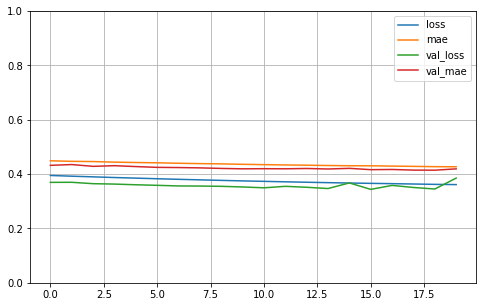

In [21]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
X_new=X_test[:3]

In [22]:
y_pred = model.predict(X_new)
print(y_pred)

[[0.6071852]
 [1.8601747]
 [3.7925048]]


In [23]:
print(y_test[:3])

[0.477   0.458   5.00001]


In [24]:
del model

In [25]:
keras.backend.clear_session()

In [28]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30 , activation="relu")(input_)
hidden2=keras.layers.Dense(30 , activation="relu")(hidden1)
concat=keras.layers.concatenate([input_ , hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_] , outputs=[output])

In [29]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_3[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_3[0][0]                    
                                                                 dense_6[0][0]         

In [30]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["mae"])

In [35]:
model_history = model.fit(X_train , y_train , epochs=50 , validation_data=(X_valid , y_valid))

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3655 - mae: 0.4290 - val_loss: 0.3490 - val_mae: 0.4161
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3652 - mae: 0.4284 - val_loss: 0.3739 - val_mae: 0.4234
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3645 - mae: 0.4287 - val_loss: 0.3474 - val_mae: 0.4155
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3633 - mae: 0.4277 - val_loss: 0.3437 - val_mae: 0.4177
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3629 - mae: 0.4270 - val_loss: 0.3417 - val_mae: 0.4158
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3616 - mae: 0.4268 - val_loss: 0.3531 - val_mae: 0.4153
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3615 - mae: 0.4260 - val_loss: 0.3551 - val_mae: 0.4167
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [36]:
mae_test=model.evaluate(X_test , y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3412 - mae: 0.4097


In [33]:
model_history.history

{'loss': [1.9555507898330688,
  0.8788676261901855,
  0.7203900814056396,
  0.6638119220733643,
  0.6180918216705322,
  0.5800491571426392,
  0.5514811277389526,
  0.529137372970581,
  0.506376326084137,
  0.4888332784175873,
  0.47620975971221924,
  0.46231070160865784,
  0.45454543828964233,
  0.44369855523109436,
  0.4360165297985077,
  0.42917361855506897,
  0.42399266362190247,
  0.4191461205482483,
  0.413928747177124,
  0.4112672805786133,
  0.4073503911495209,
  0.4047315716743469,
  0.4018203914165497,
  0.3991885483264923,
  0.39689356088638306,
  0.39492523670196533,
  0.39337921142578125,
  0.39168781042099,
  0.38983333110809326,
  0.388418972492218,
  0.386412113904953,
  0.38518616557121277,
  0.3844786286354065,
  0.38216283917427063,
  0.3813483417034149,
  0.38023456931114197,
  0.37902241945266724,
  0.3781374394893646,
  0.3768531084060669,
  0.375517338514328,
  0.374965637922287,
  0.37414905428886414,
  0.37301012873649597,
  0.37153035402297974,
  0.371526002883

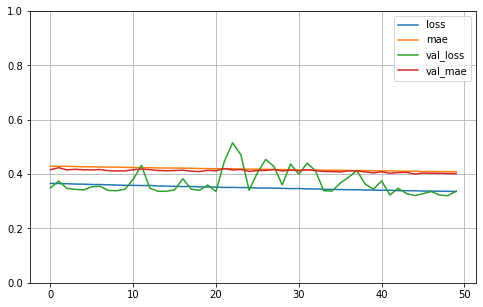

In [37]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Saving and Restoring

In [39]:
model.save("my_Func_model.h5")

In [40]:
%pwd

'C:\\Users\\rajpoot'

%cd -->> for changing directory

In [41]:
del model 

In [42]:
keras.backend.clear_session()

In [44]:
model = keras.models.load_model("my_Func_model.h5")

In [45]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_3[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_3[0][0]                    
                                                                 dense_6[0][0]         

In [46]:
y_pred=model.predict(X_new)
print(y_pred)

[[0.6260144]
 [1.6178424]
 [3.9852567]]


# Using Callbacks

In [48]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [49]:
model = keras.models.Sequential([
    keras.layers.Dense(30 , activation="relu" , input_shape=[8]),
    keras.layers.Dense(30 , activation="relu"),
    keras.layers.Dense(1)
])

In [52]:
model.compile(loss="mse" , optimizer=keras.optimizers.SGD(lr=1e-3))

In [53]:
checkpoint_cb= keras.callbacks.ModelCheckpoint("Model -{epoch:02d}.h5")

In [54]:
history = model.fit(X_train , y_train , epochs=20 , validation_data=(X_valid , y_valid) , callbacks=[checkpoint_cb])

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4474 - val_loss: 0.4379

In [55]:
del model

In [56]:
keras.backend.clear_session()

In [60]:
model = keras.models.load_model("Model -10.h5")

In [62]:
mse_test = model.evaluate(X_test , y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4382


# Best Model Only

In [63]:
del model
keras.backend.clear_session()

In [64]:
model = keras.models.Sequential([
    keras.layers.Dense(30 , activation="relu" , input_shape=[8]),
    keras.layers.Dense(30 , activation="relu"),
    keras.layers.Dense(1)
])

In [65]:
model.compile(loss="mse" , optimizer=keras.optimizers.SGD(lr=1e-3))

In [66]:
checkpoint_cb= keras.callbacks.ModelCheckpoint("Early_stop_model.h5" , save_best_only=True)

In [67]:
early_stopping_cb= keras.callbacks.EarlyStopping(patience=10 , restore_best_weights=True)

In [69]:
history = model.fit(X_train , y_train , epochs=200 , validation_data=(X_valid , y_valid) , callbacks=[checkpoint_cb , early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4333 - val_loss: 0.4239
Epoch 2/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4251 - val_loss: 0.4403
Epoch 3/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4184 - val_loss: 0.4407
Epoch 4/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4125 - val_loss: 0.4481
Epoch 5/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4082 - val_loss: 0.4347
Epoch 6/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4039 - val_loss: 0.4566
Epoch 7/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4006 - val_loss: 0.4609
Epoch 8/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3973 - val_loss: 0.4354
Epoch 9/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3944 - val_loss: 0.4485
Epoch 10/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3916 - val_lo

In [70]:
model = keras.models.load_model("early_stop_model.h5")

In [71]:
mse_test = model.evaluate(X_test , y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3870
